In [2]:
%matplotlib inline
import numpy as np
from matplotlib import rc
import deepdish as dd

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

rc('font', **font)
#rc('text',usetex=True)
import matplotlib.pyplot as plt
import h5py

In [40]:
def get_index_number(n, z = None, z_index = None):

    all_n = np.arange(-10, 2.5 ,0.5) # we cut off n = 2.5, 3, 3.5, 4 because Cloudy

    all_z = [0.0000e+00, 1.2202e-01, 2.5893e-01, 4.1254e-01, 5.8489e-01, 7.7828e-01, 9.9526e-01, 1.2387e+00,
             1.5119e+00, 1.8184e+00, 2.1623e+00, 2.5481e+00, 2.9811e+00, 3.4668e+00, 4.0119e+00, 4.6234e+00,
             5.3096e+00, 6.0795e+00, 6.9433e+00, 7.9125e+00, 9.0000e+00, 1.0220e+01, 1.1589e+01, 1.3125e+01,
             1.4849e+01]

    
    index1 = np.argmin( np.abs(all_n - n))
    
    if z_index is None and z is None:
        index2 = 0 # redshift zero
    elif z_index is None:
        index2 = np.argmin( np.abs(all_z - z))
    elif z is None:
        if z_index < 0:
            z_index = np.size(all_z) + z_index
            
        index2 = z_index
    else:
        print "Cannot provide both a redshift value and redshift bin value"
        raise ValueError
        
    
    run_num = (index1)*len(all_z) + (index2 + 1)
    
    print index1, index2, run_num
    

#j = 0
#for i in np.arange(1, 626,1):
#    
#    n_z_list[i-1] = (all_n[j], all_z[(i-1) % (np.size(all_z))])
    
#    j = j + 1
#    if j >= np.size(all_n):
#        j = 0
        
#n_z_dict = {}
#
#i = 1
#for t in n_z_list:
#    n_z_dict[t] = i
#    i = i + 1
    
#i = 1
#n_z_dict_2 = {}
#for t in n_z_list:
#    n_z_dict_2[(t[0], (i-1)%(np.size(all_z)))] = i
#    i = i + 1

In [41]:
data_type = 'shielded'

if data_type == 'thin':
    data = h5py.File('./CloudyData_UVB=HM2012.h5')
elif data_type == 'shielded':
    data = h5py.File('./CloudyData_UVB=HM2012_shielded.h5')
elif data_type == 'shielded_cooling_only':
    data = dd.io.load('./CloudyData_UVB=HM2012_shielded_cooling_only.h5')
elif data_type == 'noUVB':
    data = dd.io.load('./CloudyData_noUVB.h5')
    
#data = h5py.File('./CloudyData_UVB=HM2012_shielded_cooling_only.h5')
#data = dd.io.load('./CloudyData_UVB=HM2012_shielded.h5')
#data = h5py.File('CloudyData_UVB=HM2012.h5')
#data = h5py.File('CloudyData_noUVB.h5')

In [42]:


n = -2
Z = 0.01


In [43]:
metal_cool = data['CoolingRates']['Metals']['Cooling']

try:
    metal_heat = data['CoolingRates']['Metals']['Heating']
except:
    print 'failed to load heating'

prim_cool  = data['CoolingRates']['Primordial']['Cooling']
try:
    prim_heat  = data['CoolingRates']['Primordial']['Heating']
except:
    print 'failed to load heating'

In [45]:
print T

[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15
  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75
  2.8   2.85  2.9   2.95  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35
  3.4   3.45  3.5   3.55  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95
  4.    4.05  4.1   4.15  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55
  4.6   4.65  4.7   4.75  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15
  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75
  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35
  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95
  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55
  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.05  8.1   8.15
  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75
  8.8   8.85  8.9   8.95  9.  ]


In [ ]:
#
#
# Choose your n and z here
#
#
plot_n  = [-2, 0, 2]
z       = None
z_index = -1

0.1


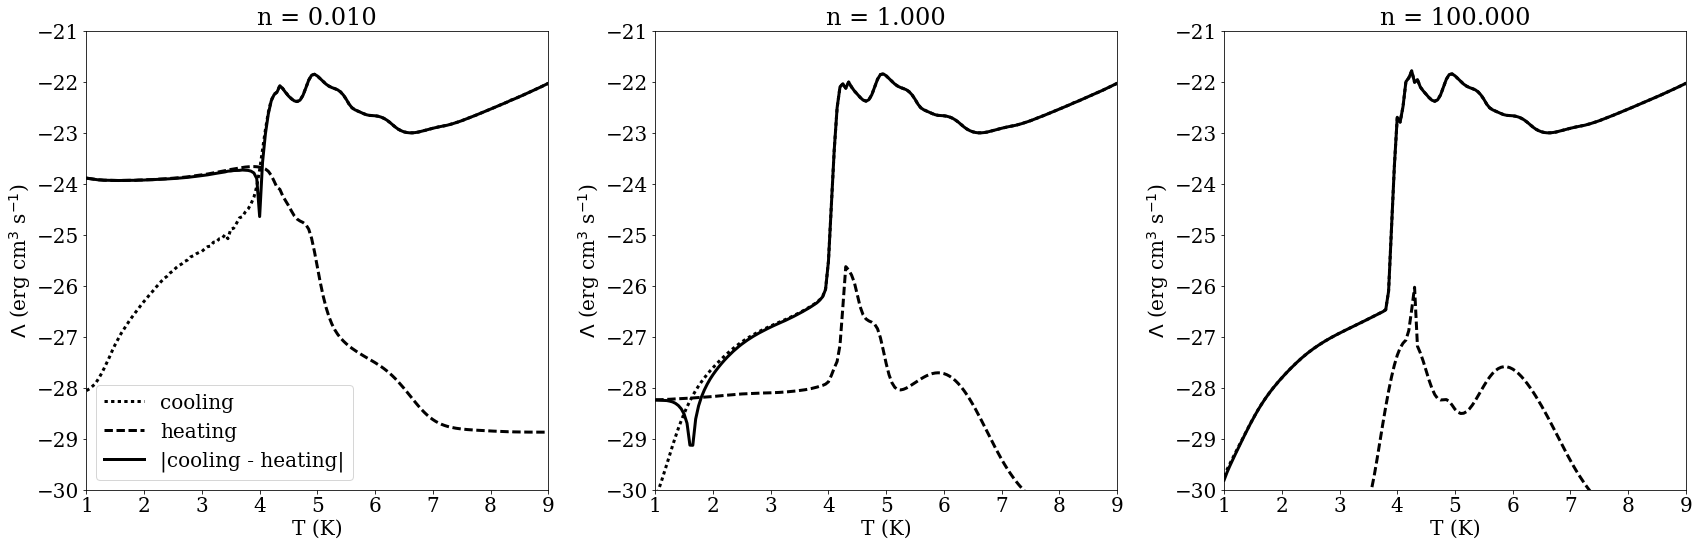

In [50]:

T = np.logspace(1,9,161)
T = np.log10(T)

fig, ax = plt.subplots(1,3)

for i in [0,1,2]:
    
    n = plot_n[i]
    
    index1, index2, run_num = get_index_number(n, z = z, z_index = z_index)
    
    try:
        index2 = 0  
    
        total_cool = metal_cool[index1][index2] * Z + prim_cool[index1][index2]
        #print prim_cool[index1][index2]
        total_heat = metal_heat[index1][index2] * Z + prim_heat[index1][index2]
        net = total_cool - total_heat
    except:
        total_cool = metal_cool[index1] * Z + prim_cool[index1]
        print 'failed to compute heating and net '

    
    ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'black', ls = ':', label = 'cooling')
    
    try:
        ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'black', ls = '--', label = 'heating')
    except:
        print 'failed to plot heating'
        
    try:
        ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'black', ls = '-', label = '|cooling - heating|')
    except:
        print 'failed to plot cooling - heating'
        
    if i == 0:
        ax[i].legend(loc='best')
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'$\Lambda$ (erg cm$^{3}$ s$^{-1}$)')
    
    ax[i].set_title(r'n = %.3f   -    Z = %0.2f Z$_{\odot}$'%(10**n,Z))


    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)



fig.set_size_inches(24,8)
plt.tight_layout()
plt.show()

if data_type == 'thin':
    fig.savefig('cooling_rates_opticallythin.png')
elif data_type == 'shielded':
    fig.savefig('cooling_rates_shielded.png')
elif data_type == 'shielded_cooling_only':
    fig.savefig('cooling_rates_shielded_cooling_only.png')
elif data_type == 'noUVB':
    fig.savefig('cooling_rates_noUVB.png')

In [47]:
thin   = h5py.File('./CloudyData_UVB=HM2012.h5')
shield = h5py.File('./CloudyData_UVB=HM2012_shielded.h5')
    
thin_metal_c = thin['CoolingRates']['Metals']['Cooling']
thin_metal_h = thin['CoolingRates']['Metals']['Heating']

shield_metal_c = shield['CoolingRates']['Metals']['Cooling']
shield_primordial_c = shield['CoolingRates']['Primordial']['Cooling']

shield_metal_h = shield['CoolingRates']['Metals']['Heating']
shield_primordial_h = shield['CoolingRates']['Primordial']['Heating']

0.1


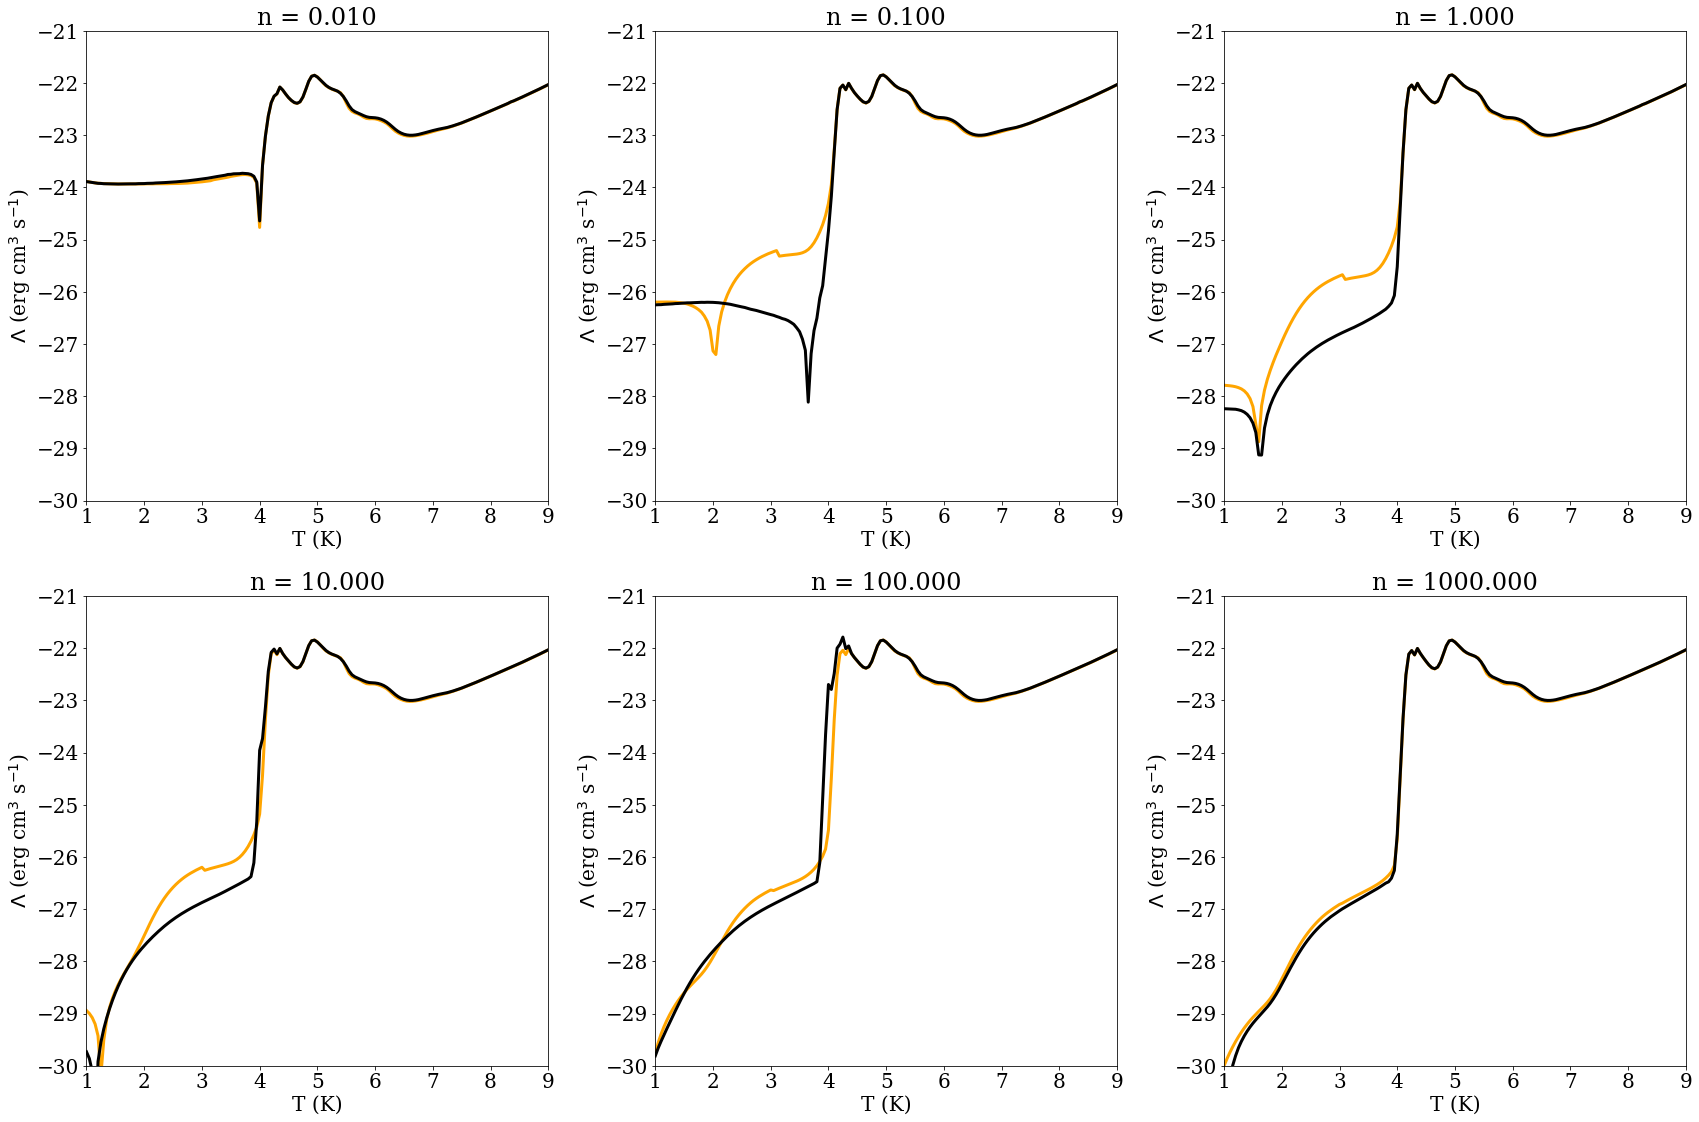

In [49]:

Z = 

plot_n = [-2, -1, 0, 1, 2, 3]

fig, ax = plt.subplots(2,3)
print Z

axis_tuple = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

for i in [0,1,2,3,4,5]:
    
    n = plot_n[i]
    
    index1 = np.argmin(np.abs(narray - n))
    
    index2 = 0  
    
    #
    # Plot Forbes et al. type cooling
    # this should be shielded primordial + optically thin metal
    #
    total_cool = thin_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = thin_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat
    
    i = axis_tuple[i]
    
#    ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'orange', ls = ':')
#    ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'orange', ls = '--')    
    ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'orange', ls = '-', label = 'Inconsistent Model')
    
    total_cool = shield_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = shield_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat    
    #ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'black', ls = ':')
    #ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'black', ls = '--')       
    ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'black', ls = '-', label = 'Metal Consistent Model')
        
    if i == 0:
        ax[i].legend(loc='best')
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'$\Lambda$ (erg cm$^{3}$ s$^{-1}$)')
    
    ax[i].set_title(r'n = %.3f   -    Z = %0.2f Z$_{\odot}$'%(10**n,Z))


    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)



fig.set_size_inches(24,16)
plt.tight_layout()
plt.show()

fig.savefig('cooling_model_comparison')